In [90]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)
df = pd.read_csv("son.csv")

In [91]:
df.drop(['24','26','27'], axis=1, inplace=True)

In [92]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,bb0,-0.014855,0.014232,-2.437074e-02,1.338270,1.135949e-02,2.984557,1.416079,3.848074,7.898147,1.167775,3.628363,7.678823,0.714648,3.135019,7.093101,0.999686,-0.885202,0.250034,0.035193,0.001542,3.432656,0.885283,3.877469,12877.114624,0.465055,0.631516,3.210446,1.532691,3.998247,8.042508,1.390497,3.812125,7.857010,1.097154,3.346009,7.219038,0.029660,0.112993,0.378277,0.057914,0.200454,0.472971,78081.800156,112.232412,695.715249,0.052247,0.165187,380.431580,1.822660e+00,3.623992,195.221896,40008.822082,0.000383,0.000383,0.939523,0.000065,0.000065,0.721336,0.000033,0.000033,0.430165,-0.999986,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
1,bb1,-0.014581,0.015858,4.479647e-02,1.338127,-4.578715e-03,2.987433,1.364601,3.783376,7.832856,1.115197,3.564517,7.614696,0.681373,3.076448,7.010639,0.991653,-0.988085,0.210726,0.017823,0.000544,3.408058,0.886496,3.844414,12797.459794,0.462739,0.622158,3.238566,1.531382,4.004619,8.050176,1.387297,3.821032,7.867843,1.085028,3.373887,7.248582,0.028617,0.110454,0.370045,0.055601,0.196372,0.465601,78188.530012,111.358770,702.131765,0.051666,0.164102,380.936207,1.827297e+00,3.642062,195.253166,40017.390904,0.000383,0.000383,0.934719,0.000065,0.000065,0.716589,0.000033,0.000033,0.426775,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
2,bb10,-0.014260,0.015044,-3.405356e-02,1.341251,-1.880094e-03,2.989874,1.405737,3.837305,7.887535,1.153111,3.616245,7.666923,0.703604,3.112351,7.051281,0.999881,-0.994903,0.232358,0.024195,0.000839,3.523933,0.886543,3.974916,12900.812738,0.462639,0.632448,3.268805,1.491448,3.953921,8.000112,1.349694,3.767459,7.815652,1.081770,3.308577,7.263584,0.030952,0.116395,0.390272,0.060091,0.207052,0.477800,78193.678257,111.373373,702.085934,0.051572,0.164319,380.944125,1.830550e+00,3.651297,195.279584,40024.588896,0.000383,0.000383,0.930084,0.000065,0.000065,0.710427,0.000033,0.000033,0.422033,-0.999976,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
3,bb11,-0.014012,0.016693,-6.004570e-02,1.340701,-3.426931e-03,2.990661,1.354209,3.769949,7.820001,1.127866,3.549176,7.599223,0.732121,3.049925,6.962925,0.995017,-0.908872,0.189728,0.012313,0.000295,3.160902,0.886206,3.566779,12739.867456,0.463275,0.608683,3.157414,1.629863,4.113945,8.159852,1.481139,3.933039,7.979740,1.108396,3.469576,7.325203,0.025215,0.095510,0.329977,0.049433,0.172744,0.444127,78163.876026,111.666984,699.973019,0.051893,0.164642,380.788528,1.826634e+00,3.638970,195.292946,40028.274860,0.000383,0.000383,0.937066,0.000065,0.000065,0.716566,0.000033,0.000033,0.425896,-0.999983,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
4,bb12,-0.015238,0.014393,1.005175e-01,1.340857,-2.075125e-03,3.012115,1.394446,3.821038,7.871175,1.143160,3.599469,7.650585,0.697384,3.086972,7.059985,0.967354,-0.986649,0.244943,0.031723,0.001542,3.166453,0.886346,3.572480,12780.071740,0.463033,0.611780,3.181707,1.629062,4.109613,8.157073,1.480677,3.927613,7.976473,1.110513,3.463428,7.411683,0.025351,0.096599,0.333197,0.049252,0.175125,0.446916,78175.198737,111.554989,700.777255,0.052250,0.165529,380.848126,1.822021e+00,3.619769,195.287110,40026.672320,0.000383,0.000383,0.933624,0.000065,0.000065,0.713617,0.000033,0.000033,0.423788,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,sinus95-f-16134,-0.004762,0.004762,1.004985e-07,1.341641,-1.030982e-14,1.500000,2.215248,4.661142,8.639806,2.118171,4.320516,7.913338,1.760049,3.095336,5.129283,0.746567,-0.746567,0.731701,0.666667,

In [93]:
y = df["71"]
X = df.select_dtypes(include=['int', 'float'])


In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))



Il y a 120 données pour notre set de training.
Il y a 80 données pour notre set de test


In [95]:
#Entrainement avec le set de training
model = SVC()
model.fit(X_train, y_train)

#Prédictions avec le set de test
predictions = model.predict(X_test)
print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))

Comme prédictions, nous obtenons les résultats suivants : 
['sinus' 'blanc' 'sinus' 'sinus' 'sinus' 'sinus' 'sinus' 'sinus' 'blanc'
 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'blanc' 'blanc' 'blanc'
 'blanc' 'blanc' 'blanc' 'sinus' 'blanc' 'blanc' 'sinus' 'blanc' 'blanc'
 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc'
 'sinus' 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc'
 'blanc' 'blanc' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'sinus' 'blanc'
 'sinus' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'blanc'
 'sinus' 'sinus' 'sinus' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc'
 'sinus' 'sinus' 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus']


In [96]:
#Calculer la précision
sc = model.score(X_test, y_test)
print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))

En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
1.0.


Matrice de confusion:
[[41  0]
 [ 0 39]]


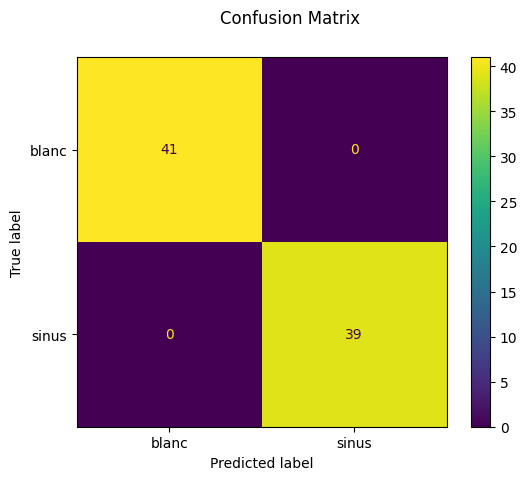

In [97]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")